In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import ndimage
from scipy import signal

In [3]:
def my_laplacian(x):
    s = x.shape
    xtemp = np.zeros(s)
    for i in range(1, s[0]-1):
        for j in range(1, s[1]-1):
            xtemp[i,j] =  -x[i,j] + (x[i+1,j]*0.2 + x[i-1,j]*0.2 + x[i,j+1]*0.2 + x[i,j-1]*0.2
                       +  x[i-1,j-1]*0.05 + x[i+1,j-1]*0.05 + x[i-1,j+1]*0.05 + x[i+1,j+1]*0.05)
    return xtemp
    

--- 378.1350643634796 seconds ---


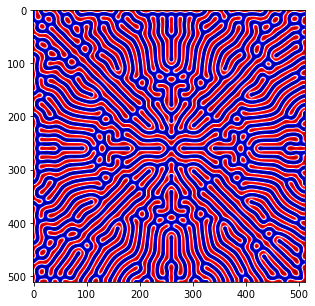

In [7]:
import time
start_time = time.time()


plt.rcParams['figure.figsize'] = [10, 5]

f,k,da,db = .055, .062, 1, .5
width,dt,t,stoptime = 128, 1, 0, 30000

weights = [[0.05, 0.2, 0.05], [0.2, -1.0, 0.2], [0.05, 0.2, 0.05]]

A = np.ones([width,width])
B = np.zeros([width,width])


x = int(width/2)
B[x:x+1+int(width/64),x:x+1+int(width/64)] = 1
kernel = np.array([[0.05, 0.2, 0.05],[0.2, -1, 0.2], [0.05, 0.2, 0.05]])

while t<stoptime:
       
    A += (da*ndimage.convolve(A,kernel,mode='reflect',cval=0.0) - A*B**2 + f*(1-A))*dt
    B += (db*ndimage.convolve(B,kernel,mode='reflect',cval=0.0) + A*B**2 - (k+f)*B)*dt
 #   A += (da*signal.fftconvolve(A,kernel,mode='same') - A*B**2 + f*(1-A))*dt
 #   B += (db*signal.fftconvolve(B,kernel,mode='same') + A*B**2 - (k+f)*B)*dt
    t +=  dt

plt.imshow(A,interpolation='Gaussian',cmap='seismic');

print("--- %s seconds ---" % (time.time() - start_time))
